# Homewok X: Gradient Descent

Welcome to the course **AI and Deep learning**!

In previous courses we have mainly used **batch gradient descent** algorithms to update the loss function, but the computational cost of the method is very high, especially when the dataset is large. In this assignment, we will discuss several derived gradient descent algorithms. Hope you enjoy this homework! 

**Learning Goal**: In this homework,  we will first introduce the **mini-batch gradient descent** method, which extends the batch gradient algorithm, and a moderate amount of small batch selection can improve the efficiency of model training. In addition, we will introduce **Momentum, RMSprop, and Adam algorithms**, which can make the model training process more stable and efficient. After this homework, you will know:
 * The core of different gradient descent algorithms.
 * How to code up a mini-batch gradient descent algorithm.
 * How to code up Momentum, RMSprop, and Adam algorithms.
 * Possible ways of learning rate decay.

## Table of content
* [1 - Packages](#1)
* [2 - Generate a training dataset](#2)
* [3 - Gradient descent algorithms](#3)
  * [3.1 - Batch Gradient Descent](#3.1)
  * [3.2 - Mini-Batch Gradient Descent](#3.2)
  * [3.3 - Momentum](#3.3)
  * [3.4 - RMSprop](#3.4)
  * [3.5 - Adam](#3.5)
  * [3.6 - Visualisation Comparison](#3.6)
* [4 - Learning rate decay](#4)
  * [4.1 - Possible ways of learning rate decay](#4.1)
  * [4.2 - Play by yourself!](#4.2)

<a name='1'></a>
## 1- Packages

In order to finish a task, we need commands from certain **Python** packages. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt # for plots

<a name='2'></a>
## 2 - Generate a training dataset

First, we generate a training dataset from a pre-specified logistic regression model. This step is the same as done in the **Logistic Regression** assignment we did earlier.

In [2]:
# PLEASE DO NOT CHANGE THE EXISTING CODE
def sigmoid(x):
    # x: input
    
    sig = 1/(1 + np.exp(-x))

    return sig

In [3]:
# PLEASE DO NOT CHANGE THE EXISTING CODE
def train_data_generation(n, rn):
    # n: sample size
    # rn: random seed
    
    np.random.seed(rn)
    x = np.random.normal(2,2**2, (n,2))
    z = -0.5 + 0.1*x[:,0] - 0.1 * x[:,1]
    a = sigmoid(z)
    y = [np.random.binomial(1,prob,1) for prob in a]
    y = np.array(y)
    
    
    return x,y

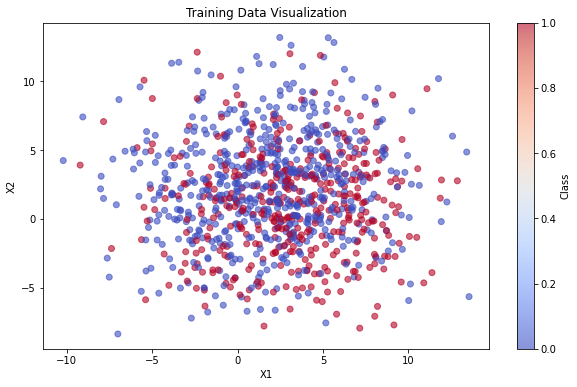

In [4]:
# PLEASE DO NOT CHANGE THE FOLLOWING CODE
x, y = train_data_generation(1000, 220)
plt.figure(figsize=(10, 6))
plt.scatter(x[:, 0], x[:, 1], c=y[:, 0], cmap='coolwarm', alpha=0.6)
plt.title('Training Data Visualization')
plt.xlabel('X1')
plt.ylabel('X2')
plt.colorbar(label='Class')

<a name='3'></a>
## 3 - Gradient descent algorithms

<a name='3.1'></a>
### 3.1 - Batch Gradient Descent

The estimated parameters $\hat{b}$ and $\hat{w}$ are obtained by minimizing the following cost function,
$$
J(b,w) = -n^{-1}\sum_{i=1}^n\{y^{(i)}\log a^{(i)} + (1-y^{(i)})\log(1-a^{(i)})\}, \tag{1}
$$
where $a^{(i)} = \sigma(z^{(i)})$ and $z^{(i)} = (x^{(i)})^Tw+b$.

In previous courses we have mainly used **batch gradient descent** algorithms to update the loss function.Now, we mainly review this method, which is mainly based on the following steps.

- Step 1.Randomly initialize $\mathbf{\theta^{(0)}}$
- Step 2.Based on $\mathbf{\theta^{(t)}}$ obtain

$$
\nabla \mathcal{J} \left( \mathbf{\theta}^{(t)} \right) = \frac{\partial \mathcal{J}}{\partial \mathbf{\theta}^{(t)}} = n^{-1} \sum_{i=1}^{n} \frac{\partial \mathcal{L}_i}{\partial \mathbf{\theta}} \left( \mathbf{\theta}^{(t)} \right)
$$

> $\mathcal{L}_i$: loss function associated with the $i$th training example

- Step 3.Update parameter

$$
\mathbf{\theta}^{(t+1)} = \mathbf{\theta}^{(t)} - \alpha \nabla \mathcal{J} \left( \mathbf{\theta}^{(t)} \right)
$$

- Step 4.Go back to Step 2 until convergence

In [5]:
# PLEASE DO NOT CHANGE THE EXISTING CODE
def batch_gradient_descent(x,y, learning_rate=0.1, tol = 10**(-8)):
    # x: the generated feature vector of length n
    # y: the generated feature vector of length n
    # alpha: learning rate
    # tol: tolerance for convergence criterion
    
    # Step 1. Obtain the sample size
    # Step 2. Augment the feature vector with the intercept term, check the relationship between \tilde{x} and x
    # Step 3. Initialize the parameter for \tilde{w}. Please notice that the size of this parameter is 3X1 2d array
    # Step 4. Initialize a counter for iterations
    # Step 5. Main loop. If number of iterations is less than 5000 and the norm between consecutive estimators is larger than the 
    #         tolerance, then do the following:
    #         Step 5.1. Obtain z using the current parameter
    #         Step 5.2. Obtain a using the current parameter
    #         Step 5.3. Obtain \nabla J
    #         Step 5.4. Update the parameter by the gradient descent method
    #         Step 5.5. add 1 to the counter

    n = len(y)
    aug_x = np.concatenate((np.ones((n,1)),x), axis = 1)

    par = np.zeros((3,1)) * 0.01
    update = np.ones((3,1))
    
    iter_index = 0
    while iter_index <5000 and np.linalg.norm(update) > 10**(-4):
        z = aug_x @ par
        A = sigmoid(z)
        
        nabla_J = np.transpose(aug_x) @ (A-y) / n
        
        update = learning_rate* nabla_J
        par -= update
        iter_index += 1
    
    return par

In [6]:
# PLEASE DO NOT CHANGE THE FOLLOWING CODE
x, y = train_data_generation(50000, 220)
print('Your estimators by the gradient descent method are:')
print(batch_gradient_descent(x,y).flatten())
print('Your result should be:\n[-0.48800121  0.09827864 -0.09948825]')
print('The true values are\n (-0.5, 0.1, -0.1)')

Your estimators by the gradient descent method are:
[-0.48800121  0.09827864 -0.09948825]
Your result should be:
[-0.48800121  0.09827864 -0.09948825]
The true values are
 (-0.5, 0.1, -0.1)


The benefit of this method is that the loss function moves towards the optimum after each update (under the assumption that the learning rate is small), but the computational cost of the method is very high, especially if the dataset is large. However, when training deep learning models, we often need large-scale training samples, so the batch gradient descent method becomes less applicable due to its lower computational efficiency.

 In this section, we will discuss several derived gradient descent algorithms. **It should be noted that the core of different gradient descent algorithms is how to calculate the ‘gradient’, without changing the rules for updating the parameters.**

<a name='3.2'></a>
### 3.2 - Mini-Batch Gradient Descent

We begin with small batch gradient descent, a method that extends the batch gradient algorithm, where a modest selection of small batches improves the training efficiency of the model. The two algorithms, small batch gradient descent and batch gradient descent, focus on **how much data is utilised to compute the gradient per iteration.**

**Idea**: use part of training examples for each iteration

**Partition** the index set of training examples: $\{i = 1, \ldots, n\} = S_1 \cup \cdots \cup S_k$
   - $|S_1| = \cdots = |S_{k-1}| = m$
   - $|S_k| \leq m$
   - $k = \lceil n/m \rceil$
   - $m$ is a power of 2, in practice
   
 
   
**Steps**
1. For the $t$th iteration, update the model parameter by

$$
\mathbf{\theta}^{(t+1)} = \mathbf{\theta}^{(t)} - \alpha \nabla \mathcal{J}_t \left( \mathbf{\theta}^{(t)} \right)
$$

$$
\nabla \mathcal{J}_t \left( \mathbf{\theta}^{(t)} \right)= \left| S_{t \% m + 1} \right|^{-1} \sum_{i \in S_{t \% m + 1}} \frac{\partial \mathcal{L}_i}{\partial \mathbf{\theta}} \left( \mathbf{\theta}^{(t)} \right)
$$


- Only use training examples in $S_{t \% m + 1}$ to obtain the gradients.

2. We finish one <font color='red'>**epoch**</font> when each training example is used

**Two special cases**
   - $m = 1$: stochastic gradient descent
   - $m = n$: batch gradient descent

**Mini-batch gradient descent** sacrifices accuracy when $m < n$

**Nevertheless**, it saves memory and is computationally more efficient

**Commonly used in practice**‘


In the following cell, you should code up Mini-Batch Gradient Descent mentioned above.

In [20]:
def mini_batch_gradient_descent(x, y, learning_rate=10**(-2), batch_size=32, tol=10**(-8)):
    # x: input feature vector of length n
    # y: target vector of length n
    # learning_rate: learning rate for gradient descent
    # batch_size: number of samples per mini-batch
    # tol: tolerance for convergence criterion
    
    # Step 1. Obtain the sample size
    # Step 2. Augment the feature vector with the intercept term
    # Step 3. Initialize the parameter for wtilde. Please notice that the size of this parameter is 3X1 2d array
    # Step 4. Initialize a counter for iterations
    # Step 5. Main loop. If number of iterations is less than 5000 and the norm between consecutive estimators is larger than the tolerance, then do the following:
    #         Step 5.1. Obtain z using the current parameter
    #         Step 5.2. Obtain a using the current parameter
    #         Step 5.3. Obtain nabla J
    #         Step 5.4. Update the parameter by the gradient descent method
    #         Step 5.5. add 1 to the counter

    ### YOUR CODE BEGINS HERE (approximately 21 lines)
    n = len(y)
    aug_x = np.concatenate((np.ones((n, 1)), x), axis=1)

    par = np.zeros((3, 1)) * 0.01
    update = np.ones((3, 1))
   
    iter_index = 0
    while iter_index < 5000 and np.linalg.norm(update) > 10**(-4):
        # Shuffle the data
        permutation = np.random.permutation(n)
        aug_x_shuffled = aug_x[permutation]
        y_shuffled = y[permutation]

        # Split into mini-batches
        num_batches = n // batch_size
        for i in range(num_batches):
            start = i * batch_size
            end = (i + 1) * batch_size
            batch_x = aug_x_shuffled[start:end]
            batch_y = y_shuffled[start:end]

            z = batch_x @ par
            A = sigmoid(z)
            
            nabla_J = np.transpose(batch_x) @ (A - batch_y) / batch_size
        
            update = learning_rate * nabla_J
            par -= update
           
        iter_index += 1
    ### YOUR CODE ENDS
    
    return par

In [21]:
# PLEASE DO NOT CHANGE THE FOLLOWING CODE
x, y = train_data_generation(50000, 220)
print('Your estimators by the gradient descent method are:')
print(mini_batch_gradient_descent(x,y).flatten())
print('Your result should be:\n[-0.49447189  0.08555559 -0.09519869]')
print('The true values are\n (-0.5, 0.1, -0.1)')

Your estimators by the gradient descent method are:
[-0.49447189  0.08555559 -0.09519869]
Your result should be:
[-0.49447189  0.08555559 -0.09519869]
The true values are
 (-0.5, 0.1, -0.1)


When actually training a neural network model, the size of the subset divided into training batches is usually $m = 2 ^ f$, where$f$is some positive integer. For example,$m = 256$ or $m = 1024$. The number of training cycles (Epochs) determines whether the model is overfitting or underfitting the training set, and the choice of their number varies from application to application.

Although mini-batch gradient descent can improve computational efficiency, some loss functions have complex forms and the gradient often does not give an efficient update strategy. For gradient descent algorithms, replace gradients by possibly more efficient vectors.

- To achieve this goal, we introduce
   - Momentum
   - RMSprop
   - Adam

<a name='3.3'></a>
### 3.3 - Momentum

#### 3.3.1 - Idea
We want to:
   - <font color='red'>Decrease</font> the <font color='red'>up-down</font> effect
   - <font color='blue'>Increase</font> the <font color='blue'>left-right</font> effect

1. Taking mean might be good?
   - Requires memory to store all the past gradients
   - Impossible for deep learning models

2. Consider **EWMA** (Exponential Weighted Moving Average)
   - Original sequence: $\{s_i : i = 1, 2, \ldots, \}$
   - EWMA sequence: $\{v_i : i = 1, 2, \ldots, \}$
   $$
   v_i = \beta_1 v_{i-1} + (1 - \beta_1) s_i \quad (i = 1, 2, \ldots)
   $$
   > $v_0 = 0$
   >
   > $\beta_1$ controls how much we stay with the "momentum" $v_{i-1}$


#### 3.3.2 - computation

- Let $g^{(t)}$ be a gradient evaluated at the current parameter for the $t$th iteration
   - It can be $db^{(t)}$ or $dW^{(t)}$
   - We ignore the superscript for layer for simplicity

- Obtain $v_b^{(t)}$ as follows

$$
\mathbf{v}_b^{(t)} = \beta_1 \mathbf{v}_b^{(t-1)} + (1 - \beta_1) \mathbf{g}^{(t)}
$$

> $\beta_1 = 0.9$: a hyperparameter, but seldom tuned
>
> $\mathbf{v}_b^{(0)} = 0$: initial momentum

- **A fact**

$$
\frac{1}{(1 - \beta_1)^{-1}} \sum_{i=1}^{\infty} \beta_1^i = 1
$$

- **More details**

$$
\begin{aligned}
\mathbf{v}^{(t)} &= \beta_1 \mathbf{v}^{(t-1)} + (1 - \beta_1) \mathbf{g}^{(t)} \\
&= (1 - \beta_1) \beta_1^{t-1} \mathbf{g}^{(1)} + (1 - \beta_1) \beta_1^{t-2} \mathbf{g}^{(2)} + \cdots + (1 - \beta_1) \mathbf{g}^{(t)} \\
&= \frac{1}{(1 - \beta_1)^{-1}} \sum_{i=1}^{t} \beta_1^{t-i} \mathbf{g}^{(i)}
\end{aligned}
$$

- When $t$ is large, it is approximately weighted average
- $(1 - \beta_1)^{-1}$: can be viewed as the "effective sample size" for EMWA


#### 3.3.3 - Momentum-based gradient descent algorithm

- Step 1. Randomly initialize $\mathbf{\theta}^{(0)}$
- Step 2. Based on the current model parameter $\mathbf{\theta}^{(t)}$, obtain $\text{db}^{[1](t)}$
   - Take the update procedure for $b^{[1]}$ as an example
   - The procedure applies to other parameters as well
- Step 3. Update
$$
\mathbf{b}^{[1](t+1)} = \mathbf{b}^{[1](t)} - \alpha \mathbf{v}_b^{[1](t+1)}
$$
   - $\mathbf{v}_b^{[1](t+1)} = \beta_1 \mathbf{v}_b^{[1](t)} + (1 - \beta_1) \text{db}^{[1](t)}$
   - $\mathbf{v}_b^{[1](0)} = 0$
   - $\beta_1 = 0.9$ by default
- Step 4. Go back to Step 2 until convergence

In the following cell, you should code up Momentum mentioned above.

In [9]:
def momentum_gradient_descent(x, y, learning_rate=0.1, momentum_rate=0.9, tol=10**(-8), max_iter=5000):
    # x: input feature vector of length n
    # y: target vector of length n
    # learning_rate: learning rate for gradient descent
    # momentum_rate: momentum rate for accelerating gradient descent
    # tol: tolerance for convergence criterion
    # max_iter: maximum number of iterations
    
    # Step 1. Obtain the sample size
    # Step 2. Augment the feature vector with the intercept term
    # Step 3. Initialize the parameter for wtilde. Please notice that the size of this parameter is 3X1 2d array
    # Step 4. Initialize a counter for iterations
    # Step 5. Initialize velocity vector
    # Step 6. Main loop. If number of iterations is less than max_iter and the norm between consecutive estimators is larger than the tolerance, then do the following:
    #         Step 6.1. Obtain z using the current parameter
    #         Step 6.2. Obtain a using the current parameter
    #         Step 6.3. Obtain nabla J
    #         Step 6.4. Update the velocity
    #         Step 6.5. Update the parameter using velocity
    #         Step 6.6. add 1 to the counter

    ### YOUR CODE BEGINS HERE (approximately 12 lines)
    n = len(y)
    aug_x = np.concatenate((np.ones((n, 1)), x), axis=1)

    par = np.random.randn(3, 1) * 0.01  
    velocity = np.zeros_like(par)
    
    iter_index = 0
    while iter_index < max_iter:
        z = aug_x @ par
        A = sigmoid(z)
        
        nabla_J = np.transpose(aug_x) @ (A - y) / n
        
        velocity = momentum_rate * velocity + learning_rate * nabla_J
        par -= velocity
        
        iter_index += 1
    ### YOUR CODE ENDS
    
    return par

In [10]:
# PLEASE DO NOT CHANGE THE FOLLOWING CODE
x, y = train_data_generation(50000, 220)
print('Your estimators by the gradient descent method are:')
print(momentum_gradient_descent(x,y).flatten())
print('Your result should be:\n[-0.49472923  0.09894479 -0.09900574]')
print('The true values are\n (-0.5, 0.1, -0.1)')

Your estimators by the gradient descent method are:
[-0.49472923  0.09894479 -0.09900574]
Your result should be:
[-0.49472923  0.09894479 -0.09900574]
The true values are
 (-0.5, 0.1, -0.1)


The Momentum algorithm, by introducing the concept of Momentum, makes the parameter update not only dependent on the current gradient, **but also takes into account the cumulative effect of previous gradients.** 

<a name='3.4'></a>
### 3.4 - RMSprop

The Momentum algorithm, despite being able to smooth the path of gradient descent more efficiently, its utilisation of the **same learning rate** on each component of the parameter results in a reduction in the efficiency of the parameter update. 
However, we would like to have **a slightly lower learning rate in the up and down directions and a slightly higher learning rate in the left and right directions**. In this way, we are able to obtain a more efficient parameter updating algorithm.


1. Randomly initialize $\mathbf{\theta}^{(0)}$
2. Based on the current model parameter $\mathbf{\theta}^{(t)}$, obtain $\text{db}^{[1](t)}$
   - Take the update procedure for $b^{[1]}$ as an example
3. Update
$$
\mathbf{b}^{[1](t+1)} = \mathbf{b}^{[1](t)} - \frac{\alpha}{\sqrt{\epsilon + \mathbf{s}_b^{[1](t+1)}}} \text{db}^{[1](t)}
$$
   - $\epsilon = 10^{-8}$ by default
   - $\mathbf{s}_b^{[1](t+1)} = \beta_2 \mathbf{s}_b^{[1](t)} + (1 - \beta_2) \text{db}^{[1]} \circ \text{db}^{[1]}$
   - $\mathbf{s}_b^{[1](0)} = 0$
   - $\beta_2 = 0.99$ by default
4. Go back to Step 2 until convergence

In the following cell, you should code up RMSprop mentioned above.

In [11]:
def rmsprop_gradient_descent(x, y, learning_rate=0.1, decay_rate=0.9, tol=10**(-8), max_iter=5000):
    # x: input feature vector of length n
    # y: target vector of length n
    # learning_rate: learning rate for gradient descent
    # decay_rate: decay rate for RMSprop
    # tol: tolerance for convergence criterion
    # max_iter: maximum number of iterations
    
    # Step 1. Obtain the sample size
    # Step 2. Augment the feature vector with the intercept term
    # Step 3. Initialize the parameter for wtilde. Please notice that the size of this parameter is 3X1 2d array
    # Step 4. Initialize a counter for iterations
    # Step 5. Initialize cache vector
    # Step 6. Main loop. If number of iterations is less than max_iter and the norm between consecutive estimators is larger than the tolerance, then do the following:
    #         Step 6.1. Obtain z using the current parameter
    #         Step 6.2. Obtain a using the current parameter
    #         Step 6.3. Obtain nabla J
    #         Step 6.4. Update the cache
    #         Step 6.5. Update the parameter using cache
    #         Step 6.6. add 1 to the counter

    ### YOUR CODE BEGINS HERE (approximately 12 lines)
    n = len(y)
    aug_x = np.concatenate((np.ones((n, 1)), x), axis=1)

    par = np.random.randn(3, 1) * 0.01  
    cache = np.zeros_like(par)
    
    iter_index = 0
    while iter_index < max_iter:
        z = aug_x @ par
        A = sigmoid(z)
        
        nabla_J = np.transpose(aug_x) @ (A - y) / n
        
        cache = decay_rate * cache + (1 - decay_rate) * nabla_J**2
        par -= learning_rate * nabla_J / (np.sqrt(cache) + 1e-8)
        
        iter_index += 1
    ### YOUR CODE ENDS
    
    return par

In [12]:
# PLEASE DO NOT CHANGE THE FOLLOWING CODE
x, y = train_data_generation(50000, 220)
print('Your estimators by the gradient descent method are:')
print(rmsprop_gradient_descent(x,y).flatten())
print('Your result should be:\n[-0.55072394  0.04950078 -0.15463113]')
print('The true values are\n (-0.5, 0.1, -0.1)')

Your estimators by the gradient descent method are:
[-0.55072394  0.04950078 -0.15463113]
Your result should be:
[-0.55072394  0.04950078 -0.15463113]
The true values are
 (-0.5, 0.1, -0.1)


The RMSprop algorithm is an optimisation algorithm based on an adaptive learning rate, which adaptively adjusts the learning rate of each model parameter by calculating an exponentially weighted moving average of the historical gradient.

<a name='3.5'></a>
### 3.5 - Adam

The **Adam (Adaptive Moment Estimation)** algorithm is an optimisation algorithm for adaptive learning rate, which is widely used for the training of neural networks in deep learning.The Adam algorithm combines the advantages of the Momentum and the RMSProp algorithm by calculating the first-order moment estimate of the gradient and the second-order moment estimate (i.e., the squared of gradient). moving average) to design independent adaptive learning rates for different parameters. This adaptive tuning allows the Adam algorithm to dynamically adjust the learning rate during the training process, thus accelerating model convergence and improving training results.

#### 3.5.1 - Idea
1. **Classical gradient descent algorithms**
$$
b^{[1](t+1)} = b^{[1](t)} - \alpha \text{db}^{[1](t)}
$$

2. **Momentum** only modifies the gradient part
$$
b^{[1](t+1)} = b^{[1](t)} - \alpha \mathbf{v}_b^{[1](t+1)}
$$

3. **RMSprop** only modifies the learning rate part
$$
b^{[1](t+1)} = b^{[1](t)} - \frac{\alpha}{\sqrt{\epsilon + \mathbf{s}_b^{[1](t+1)}}} \text{db}^{[1](t)}
$$

4. <font color='red'>**Why not combine those two together?** </font>

#### 3.5.2 - Adam (Adaptive moment estimation)

1. Randomly initialize $\mathbf{\theta}^{(0)}$
2. Based on the current model parameter $\mathbf{\theta}^{(t)}$, obtain $\text{db}^{[1](t)}$
   - Take the update procedure for $b^{[1]}$ as an example
3. Update
$$
\mathbf{b}^{[1](t+1)} = \mathbf{b}^{[1](t)} - \frac{\alpha}{\sqrt{\hat{\mathbf{s}}_b^{[1](t+1)}} + \epsilon} \hat{\mathbf{v}}_b^{[1](t+1)}
$$
   - See next slide for $\hat{\mathbf{s}}_b^{[1](t+1)}$ and $\hat{\mathbf{v}}_b^{[1](t+1)}$
   - $\epsilon = 10^{-8}$ by default
4. Go back to Step 2 until convergence
- **Computation details** for $\hat{\mathbf{s}}_b^{[1](t+1)}$ and $\hat{\mathbf{v}}_b^{[1](t+1)}$

$$
\mathbf{s}_b^{(t+1)} = \beta_2 \mathbf{s}_b^{(t)} + (1 - \beta_2) \text{db}^{(t)} \circ \text{db}^{(t)}
$$

$$
\hat{\mathbf{s}}_b^{(t+1)} = \frac{\mathbf{s}_b^{(t+1)}}{1 - \beta_2^{t+1}}
$$

$$
\mathbf{v}_b^{(t+1)} = \beta_1 \mathbf{v}_b^{(t)} + (1 - \beta_1) \text{db}^{(t)}
$$

$$
\hat{\mathbf{v}}_b^{(t+1)} = \frac{\mathbf{v}_b^{(t+1)}}{1 - \beta_1^{t+1}}
$$

> $\mathbf{v}_b^{(0)} = \mathbf{s}_b^{(0)} = 0$
>
> $\beta_1 = 0.9$ by default
>
> $\beta_2 = 0.99$ by default


In the following cell, you should code up Adam mentioned above.

In [13]:
def adam_gradient_descent(x, y, learning_rate=0.1, beta1=0.9, beta2=0.999, tol=10**(-8), max_iter=5000):
    # x: input feature vector of length n
    # y: target vector of length n
    # learning_rate: learning rate for gradient descent
    # beta1: first moment decay rate
    # beta2: second moment decay rate
    # tol: tolerance for convergence criterion
    # max_iter: maximum number of iterations
    
    # Step 1. Obtain the sample size
    # Step 2. Augment the feature vector with the intercept term
    # Step 3. Initialize the parameter for wtilde. Please notice that the size of this parameter is 3X1 2d array
    # Step 4. Initialize a counter for iterations
    # Step 5. Initialize first moment vector
    # Step 6. Initialize second moment vector
    # Step 7. Main loop. If number of iterations is less than max_iter and the norm between consecutive estimators is larger than the tolerance, then do the following:
    #         Step 7.1. Obtain z using the current parameter
    #         Step 7.2. Obtain a using the current parameter
    #         Step 7.3. Obtain nabla J
    #         Step 7.4. Update the first moment vector
    #         Step 7.5. Update the second moment vector
    #         Step 7.6. Compute bias-corrected first moment estimate
    #         Step 7.7. Compute bias-corrected second moment estimate
    #         Step 7.8. Update the parameter using bias-corrected estimates
    #         Step 7.9. add 1 to the counter

    ### YOUR CODE BEGINS HERE (approximately 16 lines)
    n = len(y)
    aug_x = np.concatenate((np.ones((n, 1)), x), axis=1)

    par = np.random.randn(3, 1) * 0.01  
    m = np.zeros_like(par)
    v = np.zeros_like(par)
    
    iter_index = 0
    while iter_index < max_iter:
        z = aug_x @ par
        A = sigmoid(z)
        
        nabla_J = np.transpose(aug_x) @ (A - y) / n
        
        m = beta1 * m + (1 - beta1) * nabla_J
        v = beta2 * v + (1 - beta2) * nabla_J**2
        
        m_hat = m / (1 - beta1**(iter_index + 1))
        v_hat = v / (1 - beta2**(iter_index + 1))
        
        par -= learning_rate * m_hat / (np.sqrt(v_hat) + 1e-8)
        
        iter_index += 1
    ### YOUR CODE ENDS
    
    return par

In [14]:
# PLEASE DO NOT CHANGE THE FOLLOWING CODE
x, y = train_data_generation(50000, 220)
print('Your estimators by the gradient descent method are:')
print(adam_gradient_descent(x,y).flatten())
print('Your result should be:\n[-0.49475821  0.09892377 -0.0990285 ]')
print('The true values are\n (-0.5, 0.1, -0.1)')

Your estimators by the gradient descent method are:
[-0.49475821  0.09892377 -0.0990285 ]
Your result should be:
[-0.49475821  0.09892377 -0.0990285 ]
The true values are
 (-0.5, 0.1, -0.1)


Adam's algorithm combines the advantages of momentum and adaptive learning rate:
* It can accelerate the convergence speed of the model;
* It is relatively insensitive to the choice of hyperparameters and has high training robustness;
* It does not require a complicated process of parameter tuning.

<a name='3.6'></a>
### 3.6 - Visualisation Comparison

You may want to run the following code to compare the speed of convergence of different gradient descent methods by plotting.

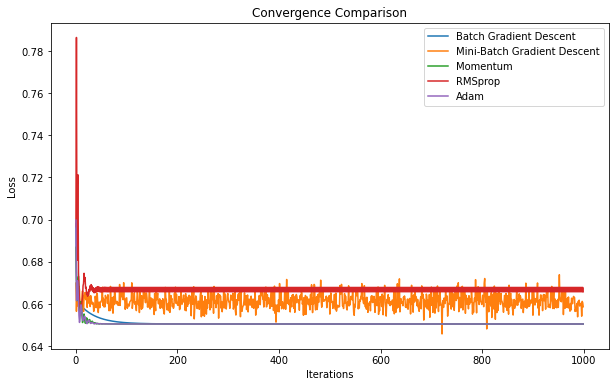

In [15]:
# PLEASE DO NOT CHANGE THE FOLLOWING CODE
x, y = train_data_generation(1000, 220)

def batch_gradient_descent(x, y, learning_rate=0.1, tol=1e-8, max_iter=1000):
    n = len(y)
    aug_x = np.concatenate((np.ones((n, 1)), x), axis=1)
    par = np.random.randn(3, 1) * 0.01
    loss_history = []

    for iter_index in range(max_iter):
        z = aug_x @ par
        A = sigmoid(z)
        loss = -np.mean(y * np.log(A) + (1 - y) * np.log(1 - A))
        loss_history.append(loss)

        nabla_J = np.transpose(aug_x) @ (A - y) / n
        par -= learning_rate * nabla_J

    return par, loss_history

def mini_batch_gradient_descent(x, y, learning_rate=0.1, batch_size=32, tol=1e-8, max_iter=1000):
    n = len(y)
    aug_x = np.concatenate((np.ones((n, 1)), x), axis=1)
    par = np.random.randn(3, 1) * 0.01
    loss_history = []

    for iter_index in range(max_iter):
        permutation = np.random.permutation(n)
        aug_x_shuffled = aug_x[permutation]
        y_shuffled = y[permutation]

        num_batches = n // batch_size
        total_loss = 0.0

        for i in range(num_batches):
            start = i * batch_size
            end = (i + 1) * batch_size
            batch_x = aug_x_shuffled[start:end]
            batch_y = y_shuffled[start:end]

            z = batch_x @ par
            A = sigmoid(z)
            loss = -np.mean(batch_y * np.log(A) + (1 - batch_y) * np.log(1 - A))
            total_loss += loss

            nabla_J = np.transpose(batch_x) @ (A - batch_y) / batch_size
            par -= learning_rate * nabla_J

        average_loss = total_loss / num_batches
        loss_history.append(average_loss)

    return par, loss_history

def momentum_gradient_descent(x, y, learning_rate=0.1, momentum_rate=0.9, tol=1e-8, max_iter=1000):
    n = len(y)
    aug_x = np.concatenate((np.ones((n, 1)), x), axis=1)
    par = np.random.randn(3, 1) * 0.01
    velocity = np.zeros_like(par)
    loss_history = []

    for iter_index in range(max_iter):
        z = aug_x @ par
        A = sigmoid(z)
        loss = -np.mean(y * np.log(A) + (1 - y) * np.log(1 - A))
        loss_history.append(loss)

        nabla_J = np.transpose(aug_x) @ (A - y) / n
        velocity = momentum_rate * velocity + learning_rate * nabla_J
        par -= velocity

    return par, loss_history

def rmsprop_gradient_descent(x, y, learning_rate=0.1, decay_rate=0.9, tol=1e-8, max_iter=1000):
    n = len(y)
    aug_x = np.concatenate((np.ones((n, 1)), x), axis=1)
    par = np.random.randn(3, 1) * 0.01
    cache = np.zeros_like(par)
    loss_history = []

    for iter_index in range(max_iter):
        z = aug_x @ par
        A = sigmoid(z)
        loss = -np.mean(y * np.log(A) + (1 - y) * np.log(1 - A))
        loss_history.append(loss)

        nabla_J = np.transpose(aug_x) @ (A - y) / n
        cache = decay_rate * cache + (1 - decay_rate) * nabla_J**2
        par -= learning_rate * nabla_J / (np.sqrt(cache) + 1e-8)

    return par, loss_history

def adam_gradient_descent(x, y, initial_learning_rate=0.1, beta1=0.9, beta2=0.999, tol=1e-8, max_iter=1000, decay_rate=0.01):
    n = len(y)
    aug_x = np.concatenate((np.ones((n, 1)), x), axis=1)
    par = np.random.randn(3, 1) * 0.01
    m = np.zeros_like(par)
    v = np.zeros_like(par)
    loss_history = []

    for iter_index in range(max_iter):
        learning_rate = initial_learning_rate / (1 + decay_rate * iter_index)
        z = aug_x @ par
        A = sigmoid(z)
        loss = -np.mean(y * np.log(A) + (1 - y) * np.log(1 - A))
        loss_history.append(loss)

        nabla_J = np.transpose(aug_x) @ (A - y) / n
        m = beta1 * m + (1 - beta1) * nabla_J
        v = beta2 * v + (1 - beta2) * nabla_J**2
        m_hat = m / (1 - beta1**(iter_index + 1))
        v_hat = v / (1 - beta2**(iter_index + 1))
        par -= learning_rate * m_hat / (np.sqrt(v_hat) + 1e-8)

    return par, loss_history

# train and record
max_iter = 1000
bgd_par, bgd_loss = batch_gradient_descent(x, y, max_iter=max_iter)
mbgd_par, mbgd_loss = mini_batch_gradient_descent(x, y, max_iter=max_iter)
mom_par, mom_loss = momentum_gradient_descent(x, y, max_iter=max_iter)
rms_par, rms_loss = rmsprop_gradient_descent(x, y, max_iter=max_iter)
adam_par, adam_loss = adam_gradient_descent(x, y, max_iter=max_iter)

# plot
plt.figure(figsize=(10, 6))
plt.plot(bgd_loss, label='Batch Gradient Descent')
plt.plot(mbgd_loss, label='Mini-Batch Gradient Descent')
plt.plot(mom_loss, label='Momentum')
plt.plot(rms_loss, label='RMSprop')
plt.plot(adam_loss, label='Adam')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Convergence Comparison')
plt.legend()
plt.show()

<a name='4'></a>
## 4 - Learning rate decay

<a name='4.1'></a>
### 4.1 - Possible ways of learning rate decay

1. **Denote**
   - $t$: iteration index
   - $epoch$: epoch index

2. **Several possible ways to decay the learning rate**

$$
\alpha_t = \frac{\alpha_0}{1 + \gamma \cdot epoch}
$$

$$
\alpha_t = \frac{\alpha_0}{\sqrt{epoch}}
$$

$$
\alpha_t = 0.95^{epoch} \cdot \alpha_0
$$

$$
\alpha_t = \frac{1}{\sqrt{t}} \cdot \alpha_0
$$

$$
\alpha_t = 0.95^t \cdot \alpha_0
$$

- $\alpha_0 = 5 \times 10^{-3}$ for example
- $\gamma = 1$ by default

<a name='4.2'></a>
### 4.2 - Play by yourself!

* With the previous exercises, you have been able to code the given functional formulas proficiently, try to write the learning rate decay method given above yourself. Consider how to add learning rate decay to a gradient descent algorithm.
* Try adjusting the hyperparameters of the algorithms (such as learning rate, momentum coefficient, batch size, etc.) and observe their influence on algorithm performance. Identify the algorithm and parameter combination that performs best on your dataset and model.